# Introduction to NLP

In this notebook we will cover basic operations that are required in any NLP operations.

1. Introduction to NLP
2. Text Preprocessing
    * Tokenization
    * Noise Removal
    * Lexicon Normalization
        * Lemmatization
        * Stemming
3. Text to Features (Feature Engineering on text data)
    * Syntactical Parsing
        * Dependency Grammar
        * Part of Speech Tagging
    * Entity Parsing
        * Phrase Detection
        * Named Entity Recognition
        * Topic Modelling
        * N-Grams
    * Statistical features
        * TF – IDF
        * Frequency / Density Features
        * Readability Features
    * Word Embeddings
4. Applications in NLP
    * Text Classification
    * Text Summarization
5. Important NLP libraries


## Introduction to NLP - Counting Text

NLTK comes with pre-packed text data.

Project Gutenberg is a group that digitizes books and literature that are mostly in the pubic domain. These works make great examples for practicing NLP. If you interested in Project Gutenberg, I recommend checking out their site. http://www.gutenberg.org/wiki/Main_Page


In [7]:
import nltk
nltk.download('gutenberg')

nltk.corpus.gutenberg.fileids()


[nltk_data] Downloading package gutenberg to /home/rk/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
md = nltk.corpus.gutenberg.words("shakespeare-hamlet.txt")

In [6]:
md[:8]

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare']

In [10]:
md.count("Hamlet")

99

In [11]:
# We can get an idea of how long the book is by seeing how many items are in our list.

len(md)

37360

In [13]:
# We can see how many unique words are used in the book.

md_set = set(md)
len(md_set)

5447

## Introduction to NLP - Frequency Distribution

In [17]:
hamlet_fd = nltk.FreqDist(md)

In [18]:
hamlet_fd

FreqDist({',': 2892, '.': 1886, 'the': 860, "'": 729, 'and': 606, 'of': 576, 'to': 576, ':': 565, 'I': 553, 'you': 479, ...})

In [19]:
hamlet_fd["the"]

860

In [20]:
# We can find the 15 most common words seen.

hamlet_fd.most_common(15)


[(',', 2892),
 ('.', 1886),
 ('the', 860),
 ("'", 729),
 ('and', 606),
 ('of', 576),
 ('to', 576),
 (':', 565),
 ('I', 553),
 ('you', 479),
 ('?', 459),
 ('a', 449),
 ('my', 435),
 ('in', 359),
 ('it', 354)]

In [22]:
# A word used only once in a collection of text is called a hapax legomenon.

hamlet_fd.hapaxes()[:15]

['William',
 'Shakespeare',
 '1599',
 'Primus',
 'Scoena',
 'Prima',
 'Centinels',
 'carefully',
 'strook',
 'releefe',
 'stirring',
 'Riuals',
 'Leige',
 'farwel',
 'relieu']

## Introduction to NLP - Bigrams


In [23]:
text = "This is the first day in Accenture office."


In [24]:
tokens = nltk.word_tokenize(text)

In [25]:
tokens

['This', 'is', 'the', 'first', 'day', 'in', 'Accenture', 'office', '.']

In [28]:
bigrams =  nltk.bigrams(tokens)

In [29]:
for item in bigrams:
    print(item)

('This', 'is')
('is', 'the')
('the', 'first')
('first', 'day')
('day', 'in')
('in', 'Accenture')
('Accenture', 'office')
('office', '.')


In [31]:
trigrams = nltk.trigrams(tokens)


In [32]:
for item in trigrams:
    print(item)

('This', 'is', 'the')
('is', 'the', 'first')
('the', 'first', 'day')
('first', 'day', 'in')
('day', 'in', 'Accenture')
('in', 'Accenture', 'office')
('Accenture', 'office', '.')


In [33]:
from nltk.util import ngrams


In [34]:
bigrams = ngrams(tokens,2)

In [36]:
[item for item in bigrams]

[('is', 'the'),
 ('the', 'first'),
 ('first', 'day'),
 ('day', 'in'),
 ('in', 'Accenture'),
 ('Accenture', 'office'),
 ('office', '.')]

In [37]:
fivegrams = ngrams(tokens,5)

In [38]:
[item for item in fivegrams]

[('This', 'is', 'the', 'first', 'day'),
 ('is', 'the', 'first', 'day', 'in'),
 ('the', 'first', 'day', 'in', 'Accenture'),
 ('first', 'day', 'in', 'Accenture', 'office'),
 ('day', 'in', 'Accenture', 'office', '.')]

## Introduction to NLP - Regular Expressions


In [40]:
import re

In [42]:
# Finding every word that start with "ne".

set([word for word in md if re.search("^ne",word)])


{'ne',
 'necessaries',
 'necessary',
 'necessitie',
 'neck',
 'necke',
 'need',
 'neede',
 'needes',
 'needfull',
 'needs',
 'neere',
 'neerer',
 'neglect',
 'neglected',
 'negligence',
 'neither',
 'nephew',
 'nere',
 'nerue',
 'neuer',
 'new',
 'newes',
 'next',
 'neyther'}

In [44]:
# Finding every word that ends with "ing".

set([word for word in md if re.search("ing$",word)])


{'According',
 'Asking',
 'Being',
 'Blasting',
 'Blessing',
 'Breathing',
 'Bring',
 'Burning',
 'Clambring',
 'Cursing',
 'Dawning',
 'Dropping',
 'Euerlasting',
 'Finding',
 'Giuing',
 'Grating',
 'Hauing',
 'Holding',
 'Ieering',
 'Importing',
 'King',
 'Lapwing',
 'Making',
 'Marching',
 'Miching',
 'Ministring',
 'Morning',
 'Nothing',
 'Passing',
 'Playing',
 'Quarelling',
 'Respeaking',
 'Ring',
 'Roaming',
 'Seeming',
 'Sindging',
 'Sleeping',
 'Something',
 'Spring',
 'Striking',
 'Threatning',
 'Touching',
 'Towring',
 'Vnderstanding',
 'Wedding',
 'according',
 'acting',
 'agreeing',
 'asking',
 'bearing',
 'beating',
 'being',
 'bleeding',
 'blessing',
 'borrowing',
 'breathing',
 'breeding',
 'bring',
 'bringing',
 'burning',
 'carrying',
 'changeling',
 'checking',
 'coming',
 'comming',
 'coniuring',
 'containing',
 'contriuing',
 'crawling',
 'croaking',
 'crowing',
 'cunning',
 'dallying',
 'declining',
 'detecting',
 'dipping',
 'disclaiming',
 'divulging',
 'doing',

In [48]:
# Finding words that are six characters long and have two n's in the middle.

set([word for word in md if re.search("^..nn..$",word)])


{'Cannon',
 'Cannot',
 'Sonnes',
 'Sonnet',
 'Tanner',
 'Tennis',
 'Winner',
 'cannot',
 'manner',
 'runnes',
 'sinnes'}

In [49]:
# Finding words of any length that have two n's.

set([word for word in md if re.search("^.*nn.*$",word)])


{'Annuall',
 'Cannon',
 'Cannoneer',
 'Cannons',
 'Cannot',
 'Fennell',
 'Innouation',
 'Kinne',
 'Nunnerie',
 'Nunnery',
 'Reuennew',
 'Sinne',
 'Sinners',
 'Sonne',
 'Sonnes',
 'Sonnet',
 'Sunne',
 'Tanner',
 'Tennis',
 'Vienna',
 'Wantonnesse',
 'Winner',
 'annexment',
 'annoint',
 'bonny',
 'cannot',
 'cunning',
 'ennactors',
 'innocculate',
 'innocent',
 'manner',
 'manners',
 'runnes',
 'scann',
 'sinne',
 'sinnes',
 'sinnewes',
 'skinnes',
 'sonne',
 'stubbornnesse',
 'thSunne',
 'truepenny',
 'tyrannically',
 'tyrannous',
 'vnkennell',
 'vnmannerly',
 'vnnaneld',
 'vnnaturall',
 'vnnerued',
 'vnsinnowed',
 'winne',
 'winnowed'}

In [50]:
# Finding words that start with "c", "h", and "r", and end in "at".

set([word for word in md if re.search("^[chr]at$",word)])

{'hat'}

## Text Preprocessing - Tokenization

In [51]:
my_string = "I am learning Natural Language Processing in Accenture office."

In [52]:
tokens = nltk.word_tokenize(my_string)


In [53]:
tokens

['I',
 'am',
 'learning',
 'Natural',
 'Language',
 'Processing',
 'in',
 'Accenture',
 'office',
 '.']

In [54]:
len(tokens)


10

In [56]:
phrase = "I am learning Natural Language Processing in Accenture office. I am learning how to tokenize!"


In [57]:
tokens_sent = nltk.sent_tokenize(phrase)


In [66]:
tokens_sent

['I am learning Natural Language Processing in Accenture office.',
 'I am learning how to tokenize!']

In [59]:
len(tokens_sent)


2

In [60]:
for item in tokens_sent:
    print(nltk.word_tokenize(item))

['I', 'am', 'learning', 'Natural', 'Language', 'Processing', 'in', 'Accenture', 'office', '.']
['I', 'am', 'learning', 'how', 'to', 'tokenize', '!']


In [69]:
tockens_sent_words = [nltk.word_tokenize(item) for item in tokens_sent]
tockens_sent_words 

[['I',
  'am',
  'learning',
  'Natural',
  'Language',
  'Processing',
  'in',
  'Accenture',
  'office',
  '.'],
 ['I', 'am', 'learning', 'how', 'to', 'tokenize', '!']]

In [75]:
#  Making everything lower case and removing punctuation.

word_lower = [word.lower() for word in tockens_sent_words[0] if word.isalpha()]

In [76]:
word_lower

['i',
 'am',
 'learning',
 'natural',
 'language',
 'processing',
 'in',
 'accenture',
 'office']

## Text Preprocessing - Noise Removal

Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.


In [ ]:
noise_list = ["is", "a", "this", "..."] 

def _remove_noise(input_text):
    words = input_text.split() 
    noise_free_words = [word for word in words if word not in noise_list] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

_remove_noise("this is a sample text")


## Text Preprocessing - Lexicon Normalization 

### Stemmers
Stemming is a process of removing and replacing word suffixes to arrive at a common root form of the word.
Stemmers help further normalize text when we run into words that might be plural, for example cat and cats.

There are many different kinds of stemmers so you have to pick the one that works best for your use case.

In [82]:
porter = nltk.PorterStemmer()

In [80]:
my_list = ["cat","cats","lie","lying","run","running","city","cities","month","monthly","woman","women"]


In [81]:
[porter.stem(word) for word in my_list]


['cat',
 'cat',
 'lie',
 'lie',
 'run',
 'run',
 'citi',
 'citi',
 'month',
 'monthli',
 'woman',
 'women']

In [83]:
lancaster = nltk.LancasterStemmer()

In [84]:
[lancaster.stem(word) for word in my_list]

['cat',
 'cat',
 'lie',
 'lying',
 'run',
 'run',
 'city',
 'city',
 'mon',
 'month',
 'wom',
 'wom']

### Lemmatization

Lemmatization, on the other hand, is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

In [89]:
# We can try to solve the normalization problem with Lemmatization.
nltk.download('wordnet')

wnlem = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/rk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
[wnlem.lemmatize(word) for word in my_list]

['cat',
 'cat',
 'lie',
 'lying',
 'run',
 'running',
 'city',
 'city',
 'month',
 'monthly',
 'woman',
 'woman']

## Text to Features (Feature Engineering)

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Syntactical Parsing, Entities / N-grams / word-based features, Statistical features, and word embeddings.


### Part of Speech Tagging

Every word in a sentence is also associated with a part of speech (pos) tag (nouns, verbs, adjectives, adverbs etc). The pos tags defines the usage and function of a word in the sentence. A part of speech tagger will identify the part of speech for a sequence of words.

In [90]:
text = "I walked to the cafe to buy coffee before work."


In [91]:
tokens = nltk.word_tokenize(text)


In [95]:
#  nltk.download('averaged_perceptron_tagger')

nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('walked', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('cafe', 'NN'),
 ('to', 'TO'),
 ('buy', 'VB'),
 ('coffee', 'NN'),
 ('before', 'IN'),
 ('work', 'NN'),
 ('.', '.')]

For an extensive list of part-of-speech tags visit: https://en.wikipedia.org/w/index.php?title=Brown_Corpus

In [96]:
nltk.pos_tag(nltk.word_tokenize("I will have desert."))


[('I', 'PRP'), ('will', 'MD'), ('have', 'VB'), ('desert', 'NN'), ('.', '.')]

In [97]:
nltk.pos_tag(nltk.word_tokenize("They will desert us."))


[('They', 'PRP'), ('will', 'MD'), ('desert', 'VB'), ('us', 'PRP'), ('.', '.')]

In [106]:
# Create a list of all alp.

md_norm = [word.lower() for word in md if word.isalpha()]
md_norm

['the',
 'tragedie',
 'of',
 'hamlet',
 'by',
 'william',
 'shakespeare',
 'actus',
 'primus',
 'scoena',
 'prima',
 'enter',
 'barnardo',
 'and',
 'francisco',
 'two',
 'centinels',
 'barnardo',
 'who',
 's',
 'there',
 'fran',
 'nay',
 'answer',
 'me',
 'stand',
 'vnfold',
 'your',
 'selfe',
 'bar',
 'long',
 'liue',
 'the',
 'king',
 'fran',
 'barnardo',
 'bar',
 'he',
 'fran',
 'you',
 'come',
 'most',
 'carefully',
 'vpon',
 'your',
 'houre',
 'bar',
 'tis',
 'now',
 'strook',
 'twelue',
 'get',
 'thee',
 'to',
 'bed',
 'francisco',
 'fran',
 'for',
 'this',
 'releefe',
 'much',
 'thankes',
 'tis',
 'bitter',
 'cold',
 'and',
 'i',
 'am',
 'sicke',
 'at',
 'heart',
 'barn',
 'haue',
 'you',
 'had',
 'quiet',
 'guard',
 'fran',
 'not',
 'a',
 'mouse',
 'stirring',
 'barn',
 'well',
 'goodnight',
 'if',
 'you',
 'do',
 'meet',
 'horatio',
 'and',
 'marcellus',
 'the',
 'riuals',
 'of',
 'my',
 'watch',
 'bid',
 'them',
 'make',
 'hast',
 'enter',
 'horatio',
 'and',
 'marcellus',
 '

In [109]:
nltk.download('universal_tagset')
md_tags = nltk.pos_tag(md_norm,tagset="universal")


[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/rk/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


In [110]:
md_tags[:15]


[('the', 'DET'),
 ('tragedie', 'NOUN'),
 ('of', 'ADP'),
 ('hamlet', 'NOUN'),
 ('by', 'ADP'),
 ('william', 'NOUN'),
 ('shakespeare', 'NOUN'),
 ('actus', 'NOUN'),
 ('primus', 'NOUN'),
 ('scoena', 'NOUN'),
 ('prima', 'NOUN'),
 ('enter', 'NOUN'),
 ('barnardo', 'NOUN'),
 ('and', 'CONJ'),
 ('francisco', 'ADJ')]

In [111]:
md_nouns = [word for word in md_tags if word[1] == "NOUN"]


In [112]:
nouns_fd = nltk.FreqDist(md_nouns)


In [113]:
nouns_fd.most_common()[:10]


[(('i', 'NOUN'), 324),
 (('ham', 'NOUN'), 223),
 (('lord', 'NOUN'), 193),
 (('d', 'NOUN'), 152),
 (('hamlet', 'NOUN'), 82),
 (('king', 'NOUN'), 79),
 (('hor', 'NOUN'), 62),
 (('tis', 'NOUN'), 53),
 (('enter', 'NOUN'), 51),
 (('t', 'NOUN'), 49)]

### Entity Extraction (Entities as features)

Entities are defined as the most important chunks of a sentence – noun phrases, verb phrases or both. Entity Detection algorithms are generally ensemble models of rule based parsing, dictionary lookups, pos tagging and dependency parsing. 

In [4]:
! pip install -U spacy
! python -m spacy download en_core_web_sm


     |████████████████████████████████| 10.4MB 917kB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 709kB/s eta 0:00:01
     |████████████████████████████████| 122kB 593kB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 673kB/s eta 0:00:01
     |████████████████████████████████| 194kB 939kB/s eta 0:00:01
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: wasabi 0.2.1
    Uninstalling wasabi-0.2.1:
      Successfully uninstalled wasabi-0.2.1
  Found existing installation: srsly 0.0.7
    Uninstalling srsly-0.0.7:
      Successfully uninstalled srsly-0.0.7
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: importlib-metadata 0.19
    Uninstalling importlib-m

In [4]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [3]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [5]:
displacy.render(nlp(str(doc)), jupyter=True, style='ent')


In [6]:
displacy.render(nlp(str(doc)), style='dep', jupyter = True, options = {'distance': 120})

In [18]:
doc  = nltk.corpus.gutenberg.raw("shakespeare-hamlet.txt")
displacy.render(nlp(str(doc)), jupyter=True, style='ent')


### Topic Modeling

In [4]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father." 
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc_complete = [doc1, doc2, doc3]
doc_clean = [doc.split() for doc in doc_complete]

In [7]:
import gensim 
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index.  
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. 
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

# Results 
print(ldamodel.print_topics())

[(0, '0.029*"driving" + 0.029*"dance" + 0.029*"of" + 0.029*"lot" + 0.029*"father" + 0.029*"around" + 0.029*"a" + 0.029*"spends" + 0.029*"practice." + 0.029*"time"'), (1, '0.083*"to" + 0.058*"My" + 0.058*"my" + 0.058*"sister" + 0.033*"sugar," + 0.033*"not" + 0.033*"have" + 0.033*"consume." + 0.033*"but" + 0.033*"bad"'), (2, '0.060*"driving" + 0.060*"cause" + 0.060*"Doctors" + 0.060*"and" + 0.060*"that" + 0.060*"blood" + 0.060*"increased" + 0.060*"stress" + 0.060*"pressure." + 0.060*"may"')]


## Term Frequency – Inverse Document Frequency (TF – IDF)

TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

**Term Frequency (TF)** – TF for a term “t” is defined as the count of a term “t” in a document “D”

**Inverse Document Frequency (IDF)** – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.

**TF . IDF** – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = ['This is sample document.', 'another random document.', 'third sample document text']
X = obj.fit_transform(corpus)
print (X)

  (0, 7)	0.5844829010200651
  (0, 2)	0.5844829010200651
  (0, 4)	0.444514311537431
  (0, 1)	0.34520501686496574
  (1, 1)	0.3853716274664007
  (1, 0)	0.652490884512534
  (1, 3)	0.652490884512534
  (2, 4)	0.444514311537431
  (2, 1)	0.34520501686496574
  (2, 6)	0.5844829010200651
  (2, 5)	0.5844829010200651


The model creates a vocabulary dictionary and assigns an index to each word. Each row in the output contains a tuple (i,j) and a tf-idf value of word at index j in document i.

## Word Embedding (Vector representation of text)

Word embedding is the modern way of representing words as vectors. The aim of word embedding is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are widely used in deep learning models such as Convolutional Neural Networks and Recurrent Neural Networks.

In [ ]:
from gensim.models import Word2Vec
sentences = [['data', 'science'], ['accenture', 'science', 'data', 'analytics'],['machine', 'learning'], ['deep', 'learning']]

# train the model on your corpus  
model = Word2Vec(sentences, min_count = 1)


In [7]:
print (model.similarity('data', 'science') )

-0.011089371


/home/rk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [9]:
print (model['learning'])

[-2.0260944e-03 -1.6380729e-03 -3.6586069e-03 -3.0093768e-03
 -1.3934568e-03 -3.6262351e-03  3.7659612e-03 -2.5012551e-03
 -2.3308385e-03 -3.6309764e-03 -4.2456929e-03 -2.9632621e-03
  1.7753972e-03 -4.7983401e-03 -8.6886971e-04 -2.6485058e-03
 -3.0392981e-03 -4.7059050e-03  4.1913437e-03  4.3784869e-03
  1.3011395e-03 -2.5320027e-03 -4.6577165e-03  2.3737880e-03
 -2.9598491e-03 -4.3589878e-03  1.3264151e-03  4.8571016e-04
  3.2554804e-03 -3.2755882e-03 -6.9270423e-04  2.4712472e-03
 -1.5203432e-03 -2.3710832e-03 -3.7627907e-03  2.0941366e-03
 -4.5387587e-03  1.8450965e-03  2.1823819e-03 -4.3619410e-03
 -2.7923444e-03 -1.1944063e-03  3.5653119e-03  3.9710039e-03
 -2.0143157e-03 -4.9330094e-03  1.0362738e-03  3.4601928e-03
  3.2539598e-03 -2.9001622e-03 -1.1897617e-03 -8.6440123e-04
 -1.0592457e-03  2.6286549e-03  4.9735080e-03 -1.9200942e-03
 -3.0359413e-04 -3.0564414e-03 -1.6805903e-03 -1.3295609e-04
 -4.0639150e-03 -3.3933832e-03 -9.5396303e-04 -4.7068777e-03
 -1.1587756e-03 -4.55980

/home/rk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
model.

## Sentence Embedding

In [ ]:
! pip install -U sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

I0125 09:05:47.582201 140009438701376 SentenceTransformer.py:29] Load pretrained SentenceTransformer: bert-base-nli-mean-tokens
I0125 09:05:47.583289 140009438701376 SentenceTransformer.py:32] Did not find a / or \ in the name. Assume to download model from server
I0125 09:05:47.584354 140009438701376 SentenceTransformer.py:68] Load SentenceTransformer from folder: /home/rk/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip
I0125 09:05:47.585700 140009438701376 configuration_utils.py:154] loading configuration file /home/rk/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip/0_BERT/config.json
I0125 09:05:47.586382 140009438701376 configuration_utils.py:174] Model config {
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "

In [4]:
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.04094490e-01  5.27476788e-01  1.17977309e+00  1.94365770e-01
  1.59113958e-01  5.45550585e-01  2.81809539e-01  1.21590652e-01
  2.91968226e-01 -3.36857736e-01 -2.49655351e-01  2.93202460e-01
  1.43483669e-01  3.80202293e-01 -2.52250403e-01 -2.62337953e-01
 -2.69968987e-01  4.68087047e-02  3.57253999e-01 -3.58307809e-01
 -2.89181005e-02  6.85313940e-02 -7.84853816e-01 -2.61793017e-01
  1.02695417e+00 -4.05540109e-01  1.93897098e-01 -1.65969580e-01
 -2.89741874e-01 -1.07936472e-01 -6.31145060e-01 -4.68853116e-01
  7.16446579e-01 -9.49060082e-01 -2.94927265e-02  1.37840109e-02
  7.03226179e-02 -2.72191092e-02 -6.25348687e-02 -5.84831834e-01
 -9.02268350e-01 -9.56011534e-01  4.95161116e-01  1.95516986e-04
 -1.52250695e+00 -6.86905921e-01 -9.08193290e-01 -1.79840341e-01
 -6.49180412e-01 -2.96631567e-02 -1.83349597e+00  1.43428370e-01
  1.93934366e-01  1.91227030e-02 -4.56058770e-01  9.44656670e-01
  1.66151

## Exercise : Data exploration using plots

In this section we will load some sentiment data and persome basic visualization on the data. We will be using a package called matplotlib to build all out graphs and plots.
'

In [8]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from string import punctuation

import re
import sklearn.feature_extraction.text as text
import matplotlib.pyplot as plt
import spacy

import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Loading the data
doc = nltk.corpus.gutenberg.raw("shakespeare-hamlet.txt")
bow = nltk.sent_tokenize(doc)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

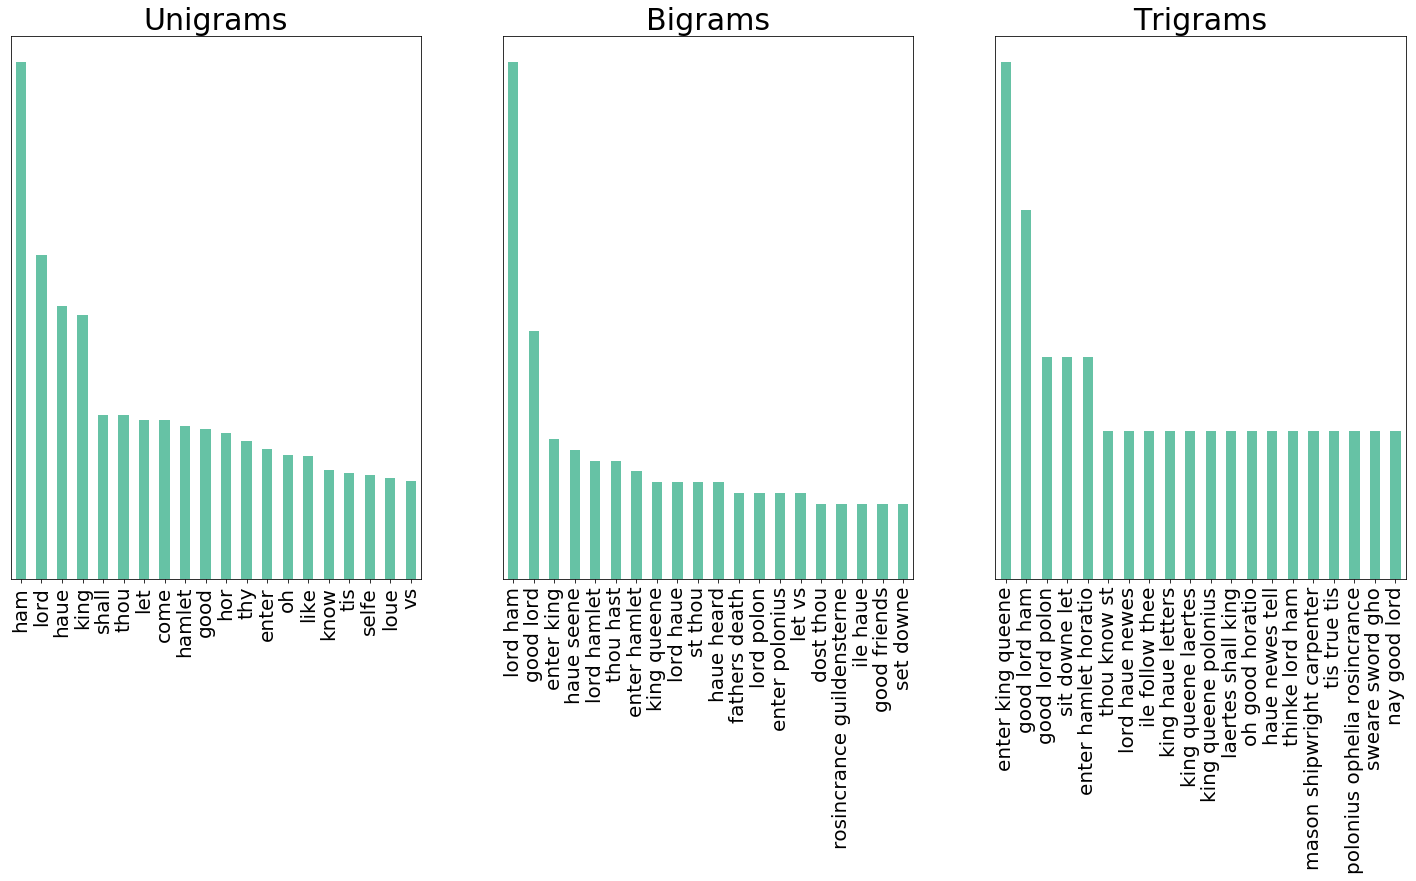

In [20]:
# Exploring the Unigram , Bigram, Trigram distribution of the data

def get_imp(bow,mf,ngram):
    tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words='english')
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)


total_data=get_imp(bow,mf=5000,ngram=1)
total_data_bigram=get_imp(bow=bow,mf=5000,ngram=2)
total_data_trigram=get_imp(bow=bow,mf=5000,ngram=3)




plt.subplot(1,3,1)
total_data.head(20).plot(kind="bar",figsize=(25,10),colormap='Set2')
plt.title("Unigrams",fontsize=30)
plt.yticks([])
plt.xticks(size=20)
plt.subplot(1,3,2)
total_data_bigram.head(20).plot(kind="bar",figsize=(25,10),colormap='Set2')
plt.title("Bigrams",fontsize=30)
plt.yticks([])
plt.xticks(size=20)
plt.subplot(1,3,3)
total_data_trigram.head(20).plot(kind="bar",figsize=(25,10),colormap='Set2')
plt.title("Trigrams",fontsize=30)
plt.yticks([])
plt.xticks(size=20)

## Observations ???



([], <a list of 0 Text yticklabel objects>)

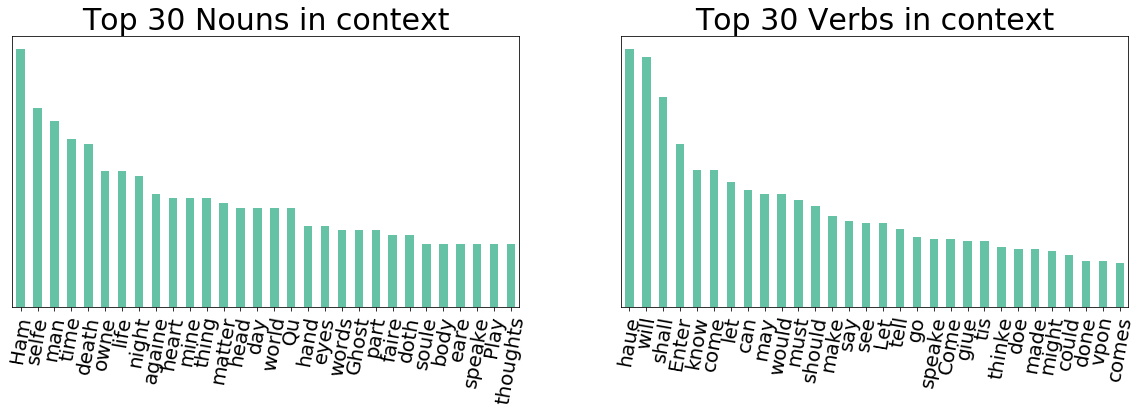

In [21]:
# Exploring the POS distribution by looking into the nouns and verbs

nlp=spacy.load("en_core_web_sm")

noun=[]
verb=[]
for doc in nlp.pipe(bow,n_threads=16,batch_size=10000):
    try:
        for c in doc:
            if c.pos_=="NOUN":
                noun.append(c.text)
            elif c.pos_=="VERB":
                verb.append(c.text)            
    except:
        noun.append("")
        verb.append("")
        
        
plt.subplot(1,2,1)
pd.Series(noun).value_counts().head(30).plot(kind="bar",figsize=(20,5),colormap="Set2")
plt.title("Top 30 Nouns in context",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])

plt.subplot(1,2,2)
pd.Series(verb).value_counts().head(30).plot(kind="bar",figsize=(20,5),colormap="Set2")
plt.title("Top 30 Verbs in context",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])        

## Observations ???




# Applications : Text Classification

In [23]:
! pip install textblob

     |████████████████████████████████| 645kB 1.9MB/s eta 0:00:01


In [25]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob
training_corpus = [
                   ('I am exhausted of this work.', 'Negative'),
                   ("I can't cooperate with this", 'Negative'),
                   ('He is my badest enemy!', 'Negative'),
                   ('My management is poor.', 'Negative'),
                   ('I love this burger.', 'Positive'),
                   ('This is an brilliant place!', 'Positive'),
                   ('I feel very good about these dates.', 'Positive'),
                   ('This is my best work.', 'Positive'),
                   ("What an awesome view", 'Positive'),
                   ('I do not like this dish', 'Negative')]
test_corpus = [
                ("I am not feeling well today.", 'Negative'), 
                ("I feel brilliant!", 'Positive'), 
                ('Gary is a friend of mine.', 'Positive'), 
                ("I can't believe I'm doing this.", 'Negative'), 
                ('The date was good.', 'Positive'), ('I do not enjoy my job', 'Negative')]

model = NBC(training_corpus) 


print(model.classify("Their codes are amazing."))

print(model.classify("I don't like their computer."))


print(model.accuracy(test_corpus))


Positive
Negative
0.8333333333333334


# Applications : Text Summarization

In [26]:
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer

from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.parsers.plaintext import PlaintextParser

In [32]:
LANGUAGE = 'english'
stemmer = Stemmer(LANGUAGE)
summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

text = ''' Accenture plc, stylised as accenture, is an Irish-domiciled multinational professional services company that provides services in strategy, consulting, digital, technology and operations. A Fortune Global 500 company,[6] it has been incorporated in Dublin, Ireland since September 1, 2009. In 2019, the company reported net revenues of $43.2 billion, with more than 492,000 employees[4] serving clients in more than 200 cities in 120 countries.[7] In 2015, the company had about 150,000 employees in India,[8] 48,000 in the US,[9] and 50,000 in the Philippines.[10] Accenture's current clients include 92 of the Fortune Global 100 and more than three-quarters of the Fortune Global 500.[11] On July 11, 2019, Accenture appointed Julie Sweet as their new Chief Executive Officer. She accepted her office on September 1, 2019.[12]'''

parser = PlaintextParser.from_string(text, Tokenizer(LANGUAGE))

In [34]:
nsent = 2
summary1 = ''

for sentence in summarizer(parser.document, nsent):
    summary1 += str(sentence)

summary1    

'A Fortune Global 500 company,[6] it has been incorporated in Dublin, Ireland since September 1, 2009.In 2019, the company reported net revenues of $43.2 billion, with more than 492,000 employees[4] serving clients in more than 200 cities in 120 countries.'

# Important Libraries for NLP (python)

* Tensorflow
* PyTorch
* huggingface/transformers
* Scikit-learn 
* Natural Language Toolkit (NLTK)
* Pattern
* TextBlob
* spaCy
* Gensim
* Stanford Core NLP